In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/pbs/home/c/cmurray/cluster_likelihood/')
import modules.simulation as simulation
import pyccl as ccl

In [9]:
simulator = simulation.UniverseSimulator( None , '/pbs/home/c/cmurray/cluster_likelihood/config/capish.ini')

In [10]:
cosmo = ccl.Cosmology( Omega_c = 0.25, 
                       Omega_b = 0.05, 
                       h = 0.7 , 
                       sigma8 = 0.8, 
                       n_s= 0.96)

In [26]:
cosmo_lcdm = ccl.Cosmology( Omega_c = 0.265, 
                       Omega_b = 0.05, 
                       h = 0.7 , 
                       sigma8 = 0.8, 
                       n_s= 0.96)

In [29]:
cosmo_desi = ccl.Cosmology( Omega_c = 0.25, 
                       Omega_b = 0.05, 
                       h = 0.7 , 
                       sigma8 = 0.8, 
                       n_s= 0.96,
                       w0 = -0.5,   # change dark energy equation of state parameter w0
                       wa = -2.,
                       extra_parameters = {"camb": {'dark_energy_model' : 'ppf', }} ) 

(0.1, 1000)

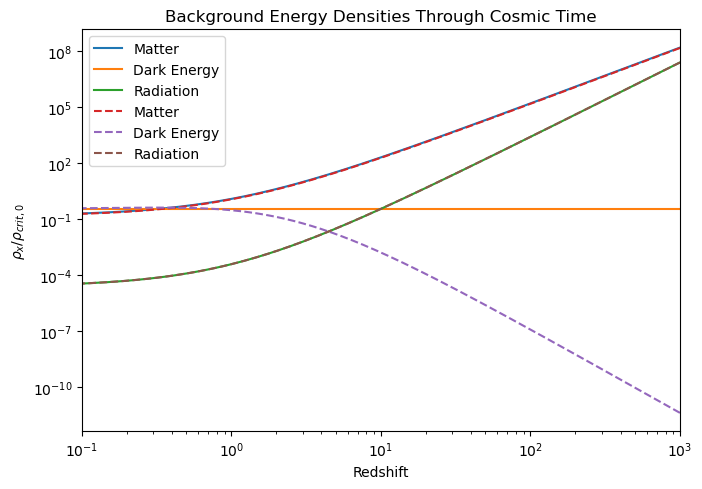

In [33]:
# Compute and plot background energy densities as a function of scale factor

a = np.logspace( -3, 0, 200)  # scale factor from early universe to today

rho_crit0 = ccl.physical_constants.RHO_CRITICAL
rho_m = ccl.background.rho_x(cosmo_lcdm, a, 'matter') / rho_crit0
rho_de = ccl.background.rho_x(cosmo_lcdm, a, 'dark_energy') / rho_crit0
rho_rad = ccl.background.rho_x(cosmo_lcdm, a, 'radiation') / rho_crit0

plt.figure(figsize=(7,5))
plt.loglog(1/a-1, rho_m, label='Matter')
plt.loglog(1/a-1, rho_de, label='Dark Energy')
plt.loglog(1/a-1, rho_rad, label='Radiation')

rho_crit0 = ccl.physical_constants.RHO_CRITICAL
rho_m = ccl.background.rho_x(cosmo_desi, a, 'matter') / rho_crit0
rho_de = ccl.background.rho_x(cosmo_desi, a, 'dark_energy') / rho_crit0
rho_rad = ccl.background.rho_x(cosmo_desi, a, 'radiation') / rho_crit0

plt.loglog(1/a-1, rho_m , '--', label='Matter')
plt.loglog(1/a-1, rho_de , '--', label='Dark Energy')
plt.loglog(1/a-1, rho_rad , '--', label='Radiation')

plt.xlabel('Redshift')
plt.ylabel(r'$\rho_x / \rho_{crit,0}$')
plt.title('Background Energy Densities Through Cosmic Time')
plt.legend()
plt.tight_layout()
plt.xlim( 0.1 , 1000 )
# plt.xlim( 0.1 , 2.5 )
# plt.ylim( 1e-4 , 1e1)

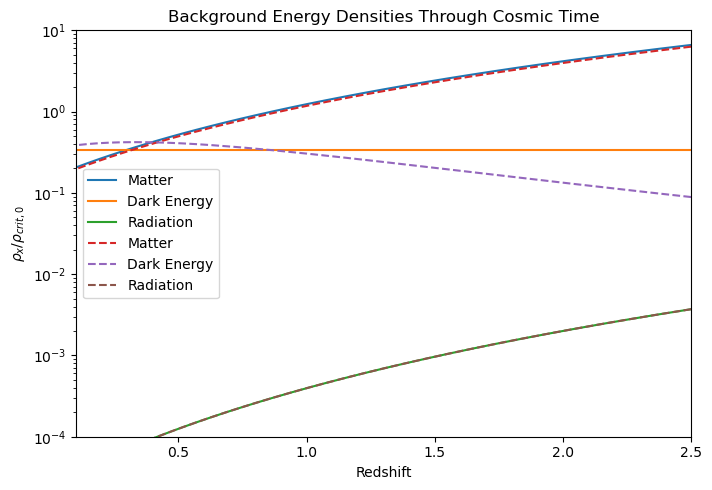

In [35]:
# Compute and plot background energy densities as a function of scale factor

a = np.logspace( -3, 0, 200)  # scale factor from early universe to today

rho_crit0 = ccl.physical_constants.RHO_CRITICAL
rho_m = ccl.background.rho_x(cosmo_lcdm, a, 'matter') / rho_crit0
rho_de = ccl.background.rho_x(cosmo_lcdm, a, 'dark_energy') / rho_crit0
rho_rad = ccl.background.rho_x(cosmo_lcdm, a, 'radiation') / rho_crit0

plt.figure(figsize=(7,5))
plt.plot(1/a-1, rho_m, label='Matter')
plt.plot(1/a-1, rho_de, label='Dark Energy')
plt.plot(1/a-1, rho_rad, label='Radiation')

rho_crit0 = ccl.physical_constants.RHO_CRITICAL
rho_m = ccl.background.rho_x(cosmo_desi, a, 'matter') / rho_crit0
rho_de = ccl.background.rho_x(cosmo_desi, a, 'dark_energy') / rho_crit0
rho_rad = ccl.background.rho_x(cosmo_desi, a, 'radiation') / rho_crit0

plt.plot(1/a-1, rho_m , '--', label='Matter')
plt.plot(1/a-1, rho_de , '--', label='Dark Energy')
plt.plot(1/a-1, rho_rad , '--', label='Radiation')

plt.xlabel('Redshift')
plt.ylabel(r'$\rho_x / \rho_{crit,0}$')
plt.title('Background Energy Densities Through Cosmic Time')
plt.legend()
plt.tight_layout()
plt.xlim( 0.1 , 2.5 )
plt.ylim( 1e-4 , 1e1)
plt.yscale('log')

In [41]:
def halo_counts( cosmo , log10min = 14.3 ):
    """
    Calculate the halo counts in a given mass range at redshift z.
    """
    log10ms , redshifts = simulator.halo_catalogue_class.get_halo_catalogue( cosmo )

    z_counts, _ = np.histogram(redshifts[ log10ms > log10min ], bins=z_bins)

    #plt.step( z_cents , z_counts, where='mid', label=f'{z_bins[i]:.2f} < z < {z_bins[i+1]:.2f}')
    plt.plot( z_cents , z_counts, '-')
    return

In [42]:
z_bins = np.linspace( 0.1 , 2.5 , 30)
z_cents = 0.5 * (z_bins[1:] + z_bins[:-1])

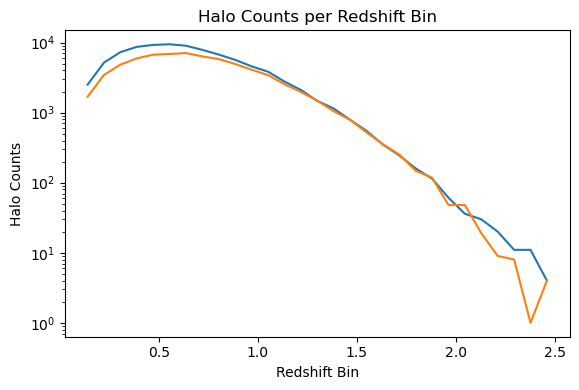

In [43]:
plt.figure(figsize=(6, 4))

cosmo = ccl.Cosmology( Omega_c = 0.25, 
                       Omega_b = 0.05, 
                       h = 0.7 , 
                       sigma8 = 0.8, 
                       n_s= 0.96)
halo_counts(cosmo)

cosmo = ccl.Cosmology( Omega_c = 0.20, 
                       Omega_b = 0.05, 
                       h = 0.7 , 
                       sigma8 = 0.8, 
                       n_s= 0.96,
                       w0 = -0.5,   # change dark energy equation of state parameter w0
                       wa = -2.,
                       extra_parameters = {"camb": {'dark_energy_model' : 'ppf', }} )   # optionally add wa for time variation,

halo_counts(cosmo)

plt.xlabel('Redshift Bin')
plt.ylabel('Halo Counts')
plt.title('Halo Counts per Redshift Bin')
plt.tight_layout()
plt.yscale('log')
plt.show()

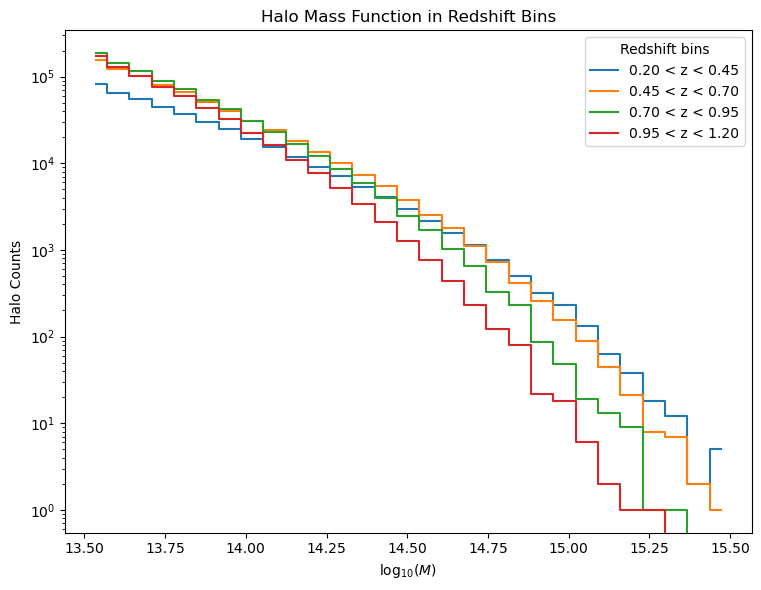

In [7]:
# Define redshift bins
z_bins = np.linspace(redshifts.min(), redshifts.max(), 5)
mass_bins = np.linspace(log10ms.min(), log10ms.max(), 30)

plt.figure(figsize=(8, 6))
for i in range(len(z_bins)-1):
    mask = (redshifts >= z_bins[i]) & (redshifts < z_bins[i+1])
    counts, edges = np.histogram(log10ms[mask], bins=mass_bins)
    bin_centers = 0.5 * (edges[1:] + edges[:-1])
    plt.step(bin_centers, counts, where='mid', label=f'{z_bins[i]:.2f} < z < {z_bins[i+1]:.2f}')

plt.xlabel(r'$\log_{10}(M)$')
plt.ylabel('Halo Counts')
plt.legend(title='Redshift bins')
plt.title('Halo Mass Function in Redshift Bins')
plt.tight_layout()
plt.yscale('log')

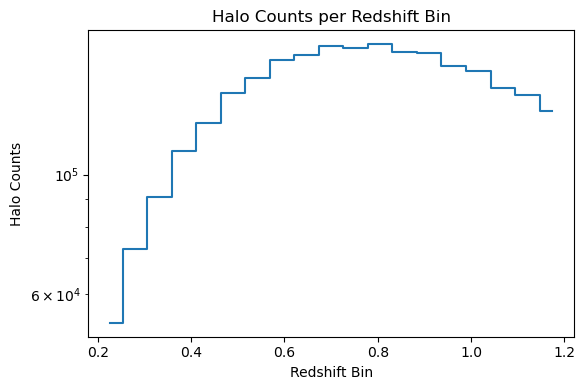

In [ ]:
# Count halos in each redshift bin and plot
z_bins = np.linspace(redshifts.min(), redshifts.max(), 20)
z_cents = 0.5 * (z_bins[1:] + z_bins[:-1])

z_counts, _ = np.histogram(redshifts, bins=z_bins)


plt.figure(figsize=(6, 4))

plt.step( z_cents , z_counts, where='mid', label=f'{z_bins[i]:.2f} < z < {z_bins[i+1]:.2f}')

plt.xlabel('Redshift Bin')
plt.ylabel('Halo Counts')
plt.title('Halo Counts per Redshift Bin')
plt.tight_layout()
plt.yscale('log')
plt.show()
